In [29]:
%matplotlib inline
%reset
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import scipy
import csv
import math

import SchemDraw as schem # to draw schematics (install using 'pip install SchemDraw')
import SchemDraw.elements as e

import skrf as rf # scikit-rf (install using 'conda -c scikit-rf scikit-rf')

import sympy # sympy (install using 'conda -c sympy sympy')
from sympy import I # imaginary symbol

rf.stylely() # enable scikit-rf plot styles
sympy.init_printing(use_latex='mathjax') # print sympy equations in MathJAX (for Jupyter)

def smart_convert(string):
    if " Hz" in string:
        return float(string.replace(" Hz", "e0"))
    elif " kHz" in string:
        return float(string.replace(" kHz", "e3"))
    elif " MHz" in string:
        return float(string.replace(" MHz", "e6"))
    elif " GHz" in string:
        return float(string.replace(" GHz", "e9"))
    elif "j" in string:
        return complex(string.replace(" ", "").replace("j", "") + "j")
    else:
        try:
            return float(string.strip())
        except ValueError:
            print('warning! smart_convert')
            return None
    
def complex_to_db(cmpx_number):
    if isinstance(cmpx_number, list) or isinstance(cmpx_number, np.ndarray):
        return [20.0 * math.log(math.sqrt(x.real**2 + x.imag**2), 10) for x in cmpx_number]
    else:
        return 20.0 * math.log(math.sqrt(cmpx_number.real**2 + cmpx_number.imag**2), 10)

def read_csv(filename, row_offset=3):
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for i in range(0, row_offset):
            next(reader)
        for row in reader:
            row = [smart_convert(d) for d in row]
            data += [row]
    return data
def mag2db(mag):
    return np.multiply(20.0, np.log10(mag))
def db2mag(db):
    return np.power(10, np.divide(db, 20.0))
def rad2deg(rad):
    return np.multiply(np.divide(rad, (2*np.pi)), 360.0)
def deg2rad(deg):
    return np.multiply(np.divide(deg, 360.0), 2*np.pi)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


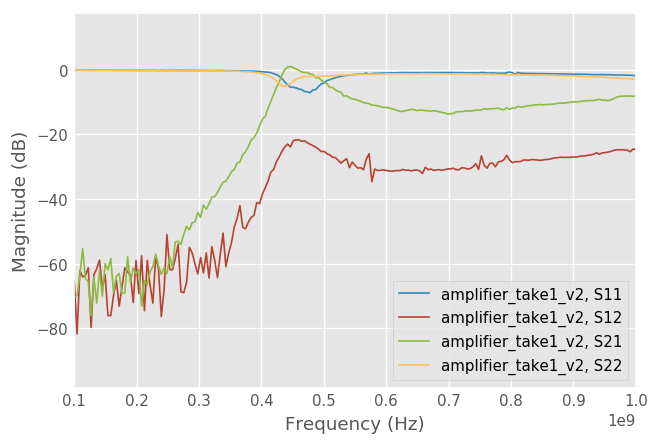

In [2]:
# Amplifier Take 1
amp1_data = rf.Network('data/amplifier_take1_v2.S2P')
amp1_data.plot_s_db()
amp1_sim = read_csv('data/amplifier_take1_sim.csv')

In [16]:
amp1_S11_meas = amp1_data.s[:,0,0]
amp1_S12_meas = amp1_data.s[:,0,1]
amp1_S21_meas = amp1_data.s[:,1,0]
amp1_S22_meas = amp1_data.s[:,1,1]
amp1_freqs_meas = np.divide(amp1_data.frequency.w, 2*np.pi)

amp1_S11_sim = [x[1] for x in amp1_sim][10:]
amp1_S12_sim = [x[2] for x in amp1_sim][10:]
amp1_S21_sim = [x[3] for x in amp1_sim][10:]
amp1_S22_sim = [x[4] for x in amp1_sim][10:]
amp1_freqs_sim = [x[0] for x in amp1_sim][10:]

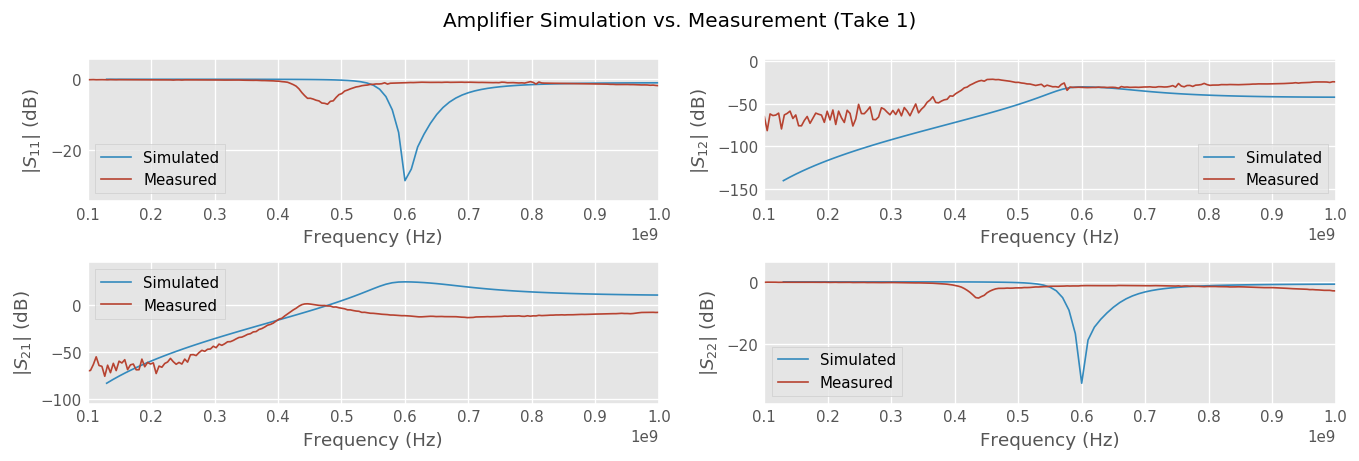

In [15]:
w, h = plt.figaspect(0.35)
fig = plt.figure(figsize=(w,h))
st = plt.suptitle('Amplifier Simulation vs. Measurement (Take 1)'); 

plt.subplot(2, 2, 1)
plt.plot(amp1_freqs_sim, mag2db(np.abs(amp1_S11_sim)))
plt.plot(amp1_freqs_meas, mag2db(np.abs(amp1_S11_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{11}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 2)
plt.plot(amp1_freqs_sim, mag2db(np.abs(amp1_S12_sim)))
plt.plot(amp1_freqs_meas, mag2db(np.abs(amp1_S12_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{12}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 3)
plt.tight_layout()
plt.plot(amp1_freqs_sim, mag2db(np.abs(amp1_S21_sim)))
plt.plot(amp1_freqs_meas, mag2db(np.abs(amp1_S21_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 4)
plt.tight_layout()
plt.plot(amp1_freqs_sim, mag2db(np.abs(amp1_S22_sim)))
plt.plot(amp1_freqs_meas, mag2db(np.abs(amp1_S22_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{22}|$ (dB)')
plt.xlabel('Frequency (Hz)')

st.set_y(0.95)
fig.subplots_adjust(top=0.85)

plt.savefig('figs/amplifier_take1_comparison.pdf', bbox_inches='tight', dpi=300)

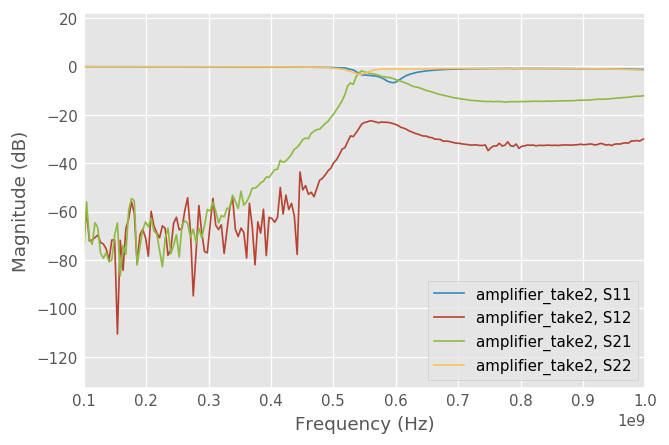

In [19]:
# Amplifier Take 2
amp2_data = rf.Network('data/amplifier_take2.S2P')
amp2_data.plot_s_db()
amp2_sim = read_csv('data/amplifier_take2_sim.csv')

In [20]:
amp2_S11_meas = amp2_data.s[:,0,0]
amp2_S12_meas = amp2_data.s[:,0,1]
amp2_S21_meas = amp2_data.s[:,1,0]
amp2_S22_meas = amp2_data.s[:,1,1]
amp2_freqs_meas = np.divide(amp2_data.frequency.w, 2*np.pi)

amp2_S11_sim = [x[1] for x in amp2_sim]
amp2_S12_sim = [x[2] for x in amp2_sim]
amp2_S21_sim = [x[3] for x in amp2_sim]
amp2_S22_sim = [x[4] for x in amp2_sim]
amp2_freqs_sim = [x[0] for x in amp2_sim]

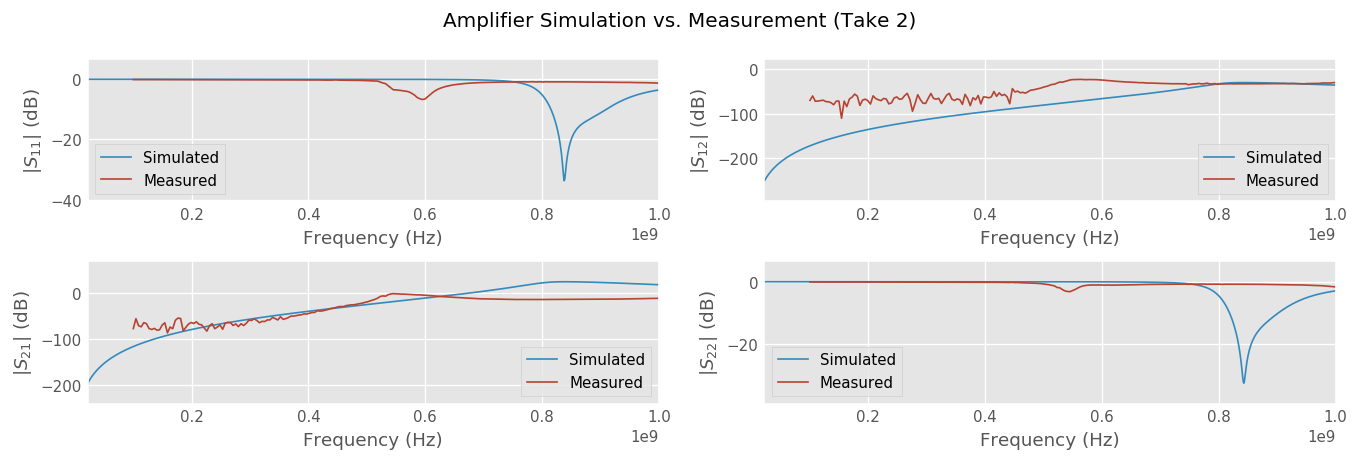

In [21]:
w, h = plt.figaspect(0.35)
fig = plt.figure(figsize=(w,h))
st = plt.suptitle('Amplifier Simulation vs. Measurement (Take 2)'); 

plt.subplot(2, 2, 1)
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S11_sim)))
plt.plot(amp2_freqs_meas, mag2db(np.abs(amp2_S11_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{11}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 2)
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S12_sim)))
plt.plot(amp2_freqs_meas, mag2db(np.abs(amp2_S12_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{12}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 3)
plt.tight_layout()
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S21_sim)))
plt.plot(amp2_freqs_meas, mag2db(np.abs(amp2_S21_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 4)
plt.tight_layout()
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S22_sim)))
plt.plot(amp2_freqs_meas, mag2db(np.abs(amp2_S22_meas)))
plt.legend(['Simulated', 'Measured'])
plt.ylabel('$|S_{22}|$ (dB)')
plt.xlabel('Frequency (Hz)')

st.set_y(0.95)
fig.subplots_adjust(top=0.85)

plt.savefig('figs/amplifier_take2_comparison.pdf', bbox_inches='tight', dpi=300)

In [24]:
amp2_parasitics_sim = read_csv('data/amplifier_take2_parasitics_sim.csv')
amp2_S11_parasitics_sim = [x[1] for x in amp2_parasitics_sim]
amp2_S12_parasitics_sim = [x[2] for x in amp2_parasitics_sim]
amp2_S21_parasitics_sim = [x[3] for x in amp2_parasitics_sim]
amp2_S22_parasitics_sim = [x[4] for x in amp2_parasitics_sim]
amp2_freqs_parasitics_sim = [x[0] for x in amp2_parasitics_sim]

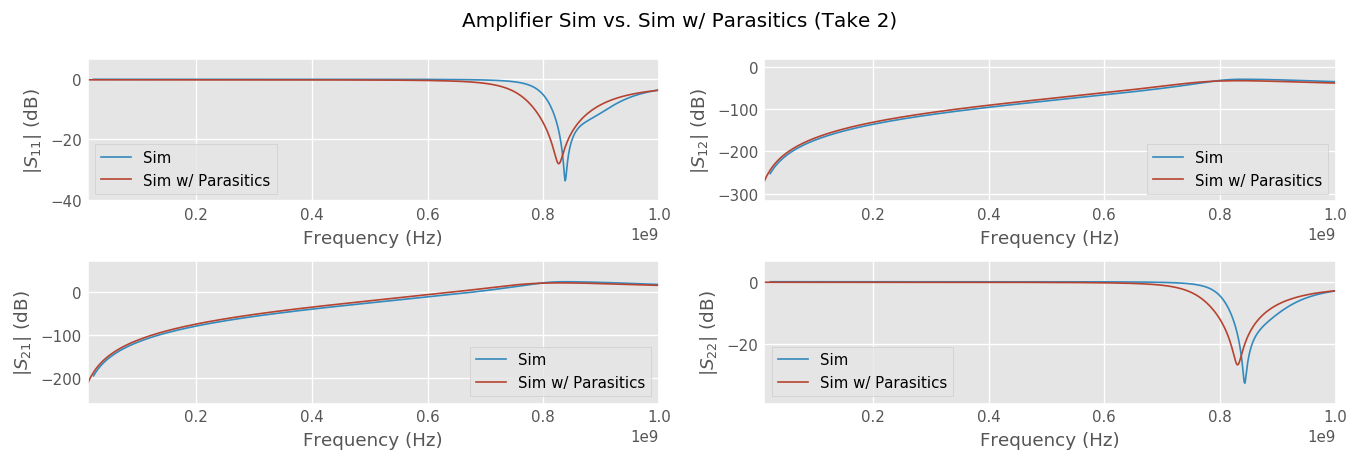

In [25]:
w, h = plt.figaspect(0.35)
fig = plt.figure(figsize=(w,h))
st = plt.suptitle('Amplifier Sim vs. Sim w/ Parasitics (Take 2)'); 

plt.subplot(2, 2, 1)
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S11_sim)))
plt.plot(amp2_freqs_parasitics_sim, mag2db(np.abs(amp2_S11_parasitics_sim)))
plt.legend(['Sim', 'Sim w/ Parasitics'])
plt.ylabel('$|S_{11}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 2)
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S12_sim)))
plt.plot(amp2_freqs_parasitics_sim, mag2db(np.abs(amp2_S12_parasitics_sim)))
plt.legend(['Sim', 'Sim w/ Parasitics'])
plt.ylabel('$|S_{12}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 3)
plt.tight_layout()
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S21_sim)))
plt.plot(amp2_freqs_parasitics_sim, mag2db(np.abs(amp2_S21_parasitics_sim)))
plt.legend(['Sim', 'Sim w/ Parasitics'])
plt.ylabel('$|S_{21}|$ (dB)')
plt.xlabel('Frequency (Hz)')

plt.subplot(2, 2, 4)
plt.tight_layout()
plt.plot(amp2_freqs_sim, mag2db(np.abs(amp2_S22_sim)))
plt.plot(amp2_freqs_parasitics_sim, mag2db(np.abs(amp2_S22_parasitics_sim)))
plt.legend(['Sim', 'Sim w/ Parasitics'])
plt.ylabel('$|S_{22}|$ (dB)')
plt.xlabel('Frequency (Hz)')

st.set_y(0.95)
fig.subplots_adjust(top=0.85)

plt.savefig('figs/amplifier_take2_sim_comparison.pdf', bbox_inches='tight', dpi=300)

In [30]:
amp2_monte_sim = read_csv('data/amplifier_take2_parasitics_monte_sim.csv')
amp2_S11_monte_sim = [x[2] for x in amp2_monte_sim]
amp2_S12_monte_sim = [x[3] for x in amp2_monte_sim]
amp2_S21_monte_sim = [x[4] for x in amp2_monte_sim]
amp2_S22_monte_sim = [x[5] for x in amp2_monte_sim]
amp2_freqs_monte_sim = [x[1] for x in amp2_monte_sim]
amp2_run_monte_sim = [x[0] for x in amp2_monte_sim]

In [33]:
def X_to_L(X, f):
    return X/(2*np.pi*f)

def X_to_C(X, f):
    return 1/(X*2*np.pi*f)

def C_to_X(C, f):
    return 1/(C*2*np.pi*f)

def L_to_X(L, f):
    return L*2*np.pi*f

In [60]:
def arr_to_vals(arr, f):
    return [X_to_L(x, f) if x > 0 else X_to_C(x,f) for x in arr]

In [63]:
print(arr_to_vals([  115.0790, -304.1634], 524e6))
print(X_to_C(285.12, 524e6))

[3.495303758792409e-08, -9.985777625686759e-13]
1.0652735950732366e-12


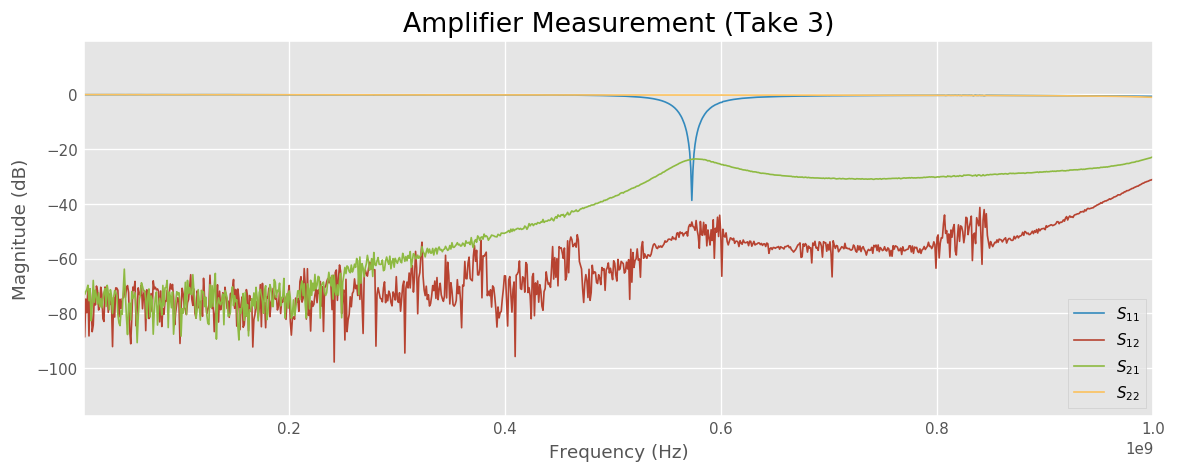

In [48]:
amp3_data = rf.Network('data/amplifier_take3.S2P')
#amp3_data.plot_s_db()
amp3_S11_meas = amp3_data.s[:,0,0]
amp3_S12_meas = amp3_data.s[:,0,1]
amp3_S21_meas = amp3_data.s[:,1,0]
amp3_S22_meas = amp3_data.s[:,1,1]
amp3_freqs_meas = np.divide(amp3_data.frequency.w, 2*np.pi)

w, h = plt.figaspect(0.35)
fig = plt.figure(figsize=(w,h))
plt.title('Amplifier Measurement (Take 3)'); 

plt.plot(amp3_freqs_meas, mag2db(np.abs(amp3_S11_meas)))
plt.plot(amp3_freqs_meas, mag2db(np.abs(amp3_S12_meas)))
plt.plot(amp3_freqs_meas, mag2db(np.abs(amp3_S21_meas)))
plt.plot(amp3_freqs_meas, mag2db(np.abs(amp3_S22_meas)))

plt.legend(['$S_{11}$', '$S_{12}$', '$S_{21}$', '$S_{22}$'])
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.savefig('figs/amplifier_take3_measurement.pdf', bbox_inches='tight', dpi=300)